# AnalogSimulation

This project is a small analog simulation framework that allows you to model and simulate various analog components and their connections. The simulator supports components such as amplifiers, integrators, comparators, adders, multipliers, constant sources, inverters and arbitrary signal generators.

The simulator uses a fixed-point iteration method to compute the output values of the blocks, making it suitable for systems that include feedback loops and other complex interconnections.


## Features
- Support for various analog components.
- Ability to add custom components by extending the Block class.
- Load and save simulation configurations and states from/to files.
- Easily modifiable and extensible codebase.
- Fixed-point iteration for simulating feedback loops.

## Imports

In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from parsers import load_simulation_from_file

## Usage 
To create a new simulation, you need to define the components (blocks) and their connections. First, instantiate the components, then create connections between them, and finally, create a Simulation object with the blocks and connections. 

Alternatively the blocks, connections and initial states together with the timestep can be defined witin an external file with the following syntax:

    BLOCK      <id>         <type>  <args>
    CONNECTION <from_id>    <to_id> <to_input>
    PARAMETER  <parameter>  <value>
    EQUATION   <expression>
    TIME       <dt>         <time>
    
And then loaded using the `load_simulation_from_file` function from the parsers module.

In [2]:
#sim = load_simulation_from_file("example_simulations/oscillator.txt")
#sim = load_simulation_from_file("example_simulations/driven_nonlinear_oscillator.txt")
#sim = load_simulation_from_file("example_simulations/single_track_model.txt")
#sim = load_simulation_from_file("example_simulations/two_mass_oscillator.txt")
sim = load_simulation_from_file("example_simulations/nonlinear_pendulum.txt")

## Simulation

To run the simulation for a specific duration, call the `run()` method on the Simulation object with the desired duration in seconds.

In [3]:
time, data = sim.run(duration=60, debug=False)

Function 'run' executed in 172.35ms


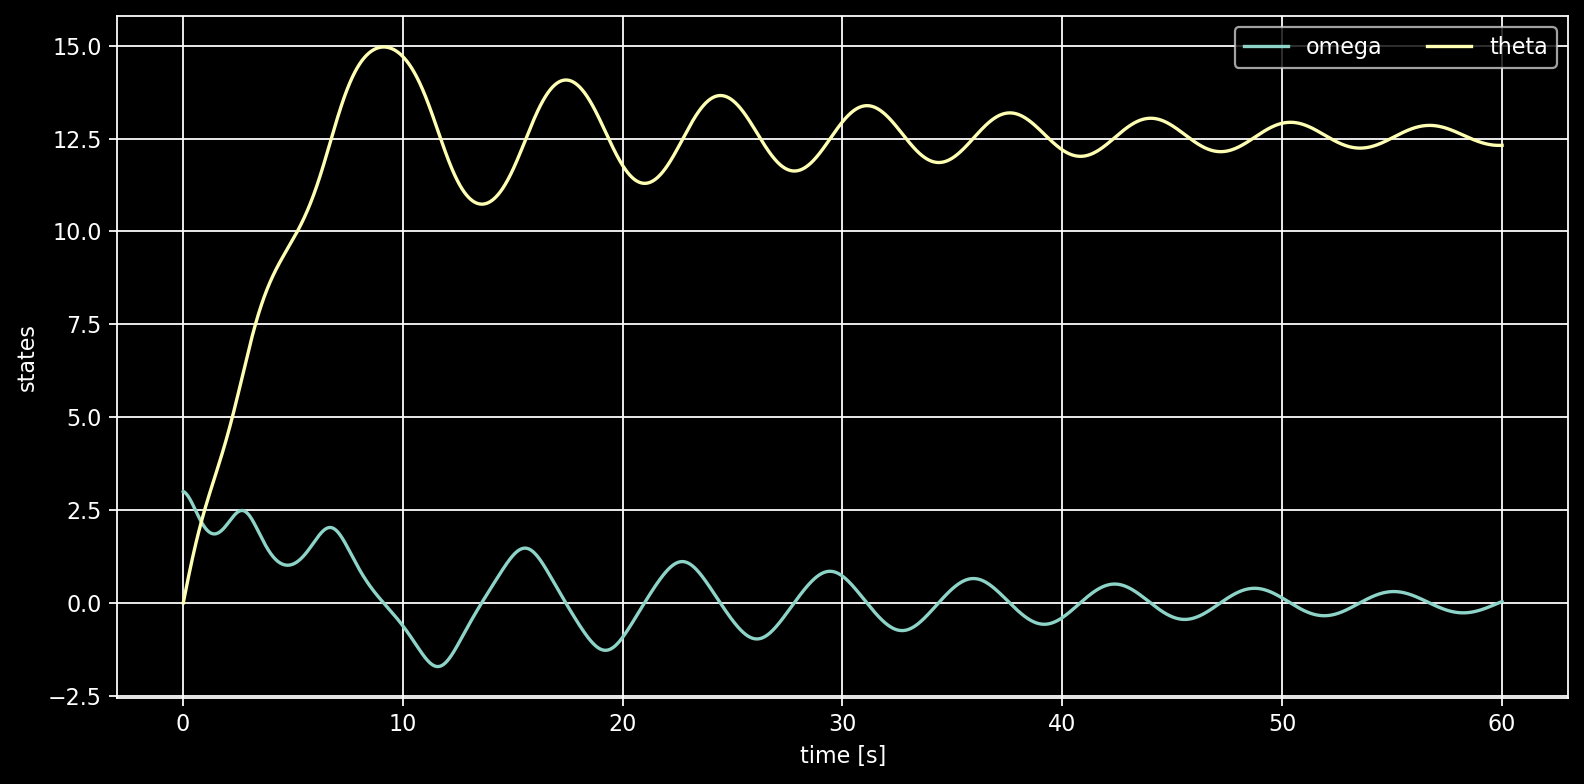

In [4]:
#plot the results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=160, tight_layout=True)

for d, block in zip(data, sim.blocks):
    if type(block).__name__ in ["Scope", "Generator"]:
        ax.plot(time, d, label=block.label)
    
ax.grid(True)
ax.set_xlabel("time [s]")
ax.set_ylabel("states")
ax.legend(loc="best", ncol=2)

plt.savefig("plot.png")

In [5]:
sim.reset()

In [6]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --ClearOutput.enabled=True --to markdown README.ipynb

[NbConvertApp] Converting notebook README.ipynb to markdown
[NbConvertApp] Support files will be in README_files\
[NbConvertApp] Making directory README_files
[NbConvertApp] Writing 3129 bytes to README.md
